# Battle of Neighborhoods | Exploring Islamabad

###### IBM Data Science Capstone Project

## Table of contents
* [Introduction](#introduction)
* [Business Problem](#b_prob)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

Islamabad is the capital city of Pakistan. The city's master plan, designed by Greek architect Constantinos Apostolou Doxiadis, divides the city into zones, including administrative, diplomatic enclave, residential areas, educational sectors, industrial sectors, commercial areas, and rural and green areas.

Islamabad city is divided into five major zones: Zone I, Zone II, Zone III, Zone IV, and Zone V. Out of these, Zone IV is the largest in area. Zone I consists mainly of all the developed residential sectors while Zone II consists of the under-developed residential sectors. Each residential sector is identified by a letter of the alphabet and a number, and covers an area of approximately 2 km × 2 km. The sectors are lettered from A to I, and each sector is divided into four numbered sub-sectors.

<p><a href="https://commons.wikimedia.org/wiki/File:Islamabad_map.png#/media/File:Islamabad_map.png"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Islamabad_map.png/1200px-Islamabad_map.png" alt="Islamabad map.png"></a></p>

## Business Problem <a name="b_prob"></a>

In this project, we will explore, segment, and cluster the Zone-1 sectors in the city of Islamabad
based on most common venue information. We will also try to answer following stakeholder
questions so they can make investment decision:

1. What are the most common venues in Zone-I?
2. Which sectors in Zone-I have highest venues?
3. Which sectors in Zone-I are yet to be developed based on most common venues?

## Data <a name="data"></a>

Following data sources will be needed to extract/generate the required information:
* general information on Islamabad will be gained from <a href="https://en.wikipedia.org/wiki/Islamabad">Wikipedia</a>
* zones and sectors information will be gained from <a href="https://en.wikipedia.org/wiki/Sectors_of_Islamabad">here</a>
* number of venues and their type and location in every sector will be obtained using **Foursquare API**
* coordinate of sectors will be obtained using **GeoPy** library  

### Neighborhood Candidates

Let's create latitude & longitude coordinates for Islamabad sectors in Zone-I & Zone-II

In [7]:
#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import requests # for http requests
import pandas as pd
import numpy as np

#!pip install folium==0.5.0 
import folium # map rendering library
from scipy.spatial import distance

In [8]:
# Islamabad: All sectors for Zone 1 & 2 
isb_sectors = ['Diplomatic Enclave', 'Pakistan Secretariat',
               'A-17', 'A-18',
               'B-17', 'B-18',
               'C-15', 'C-16', 'C-17', 'C-18',
               'D-10', 'D-11', 'D-12', 'D-13', 'D-14', 'D-15', 'D-16', 'D-17', 'D-18',
               'E-7', 'E-8', 'E-9', 'E-10', 'E-11', 'E-12', 'E-13', 'E-14', 'E-15', 'E-16', 'E-17', 'E-18',
               'F-5', 'F-6', 'F-7', 'F-8', 'F-9', 'F-10', 'F-11' , 'F-12', 'F-13', 'F-14', 'F-15', 'F-16', 'F-17', 'F-18',
               'G-5', 'G-6','G-7','G-8','G-9','G-10','G-11','G-12','G-13','G-14','G-15','G-16','G-17','G-18',
               'H-8','H-9','H-10','H-11','H-12','H-13','H-14','H-15','H-16','H-17','H-18',
               'I-8','I-9','I-10','I-11','I-12','I-13','I-14','I-15','I-16','I-17','I-18']

In [9]:
def get_lat_lon(location, verbose=True):
    if location=='C-17' or location=='D-17' or location=='D-16' or location=='E-17' or location=='E-16' or location=='E-15'or location=='F-17' or location=='F-16' or location=='F-15' or location=='G-17' or location=='G-16' or location=='G-15':
        zone='Zone-II'
    else:
        zone='Zone-I'   
    addr = location + ' , Islamabad, Pakistan' 
    geolocator = Nominatim(user_agent="isb_explorer")
    location = geolocator.geocode(addr)
    lat = location.latitude
    lon = location.longitude
    if verbose:
        print('{}: {}: {} {} '.format(zone,addr,lat,lon))
        
    return [zone, addr, lat, lon]

In [10]:
latitudes = []
longitudes = []
addresses = []
zones = []
for sector in isb_sectors:
    zone, addr,lat, lon = get_lat_lon(location=sector)
    latitudes.append(lat)
    longitudes.append(lon)
    addresses.append(addr)
    zones.append(zone)

Zone-I: Diplomatic Enclave , Islamabad, Pakistan: 33.7236061 73.1118305 
Zone-I: Pakistan Secretariat , Islamabad, Pakistan: 33.74220255 73.09561810661052 
Zone-I: A-17 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-I: A-18 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-I: B-17 , Islamabad, Pakistan: 33.6903984 72.8286389 
Zone-I: B-18 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-I: C-15 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-I: C-16 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-II: C-17 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-I: C-18 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-I: D-10 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-I: D-11 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-I: D-12 , Islamabad, Pakistan: 33.7018177 72.9486189 
Zone-I: D-13 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-I: D-14 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-I: D-15 , Islamabad, Pakistan: 33.6938118 73.0651511 
Zone-II: D-16 , I

Let's visualize the data we have so far: city center location and candidate neighborhood centers:

In [11]:
isb_center = [33.6892638,73.03240340881482] # marking G-9 as center
map_isb = folium.Map(location=isb_center, zoom_start=11)
folium.Marker(isb_center, popup='G-9 Markaz').add_to(map_isb)
for lat, lon in zip(latitudes, longitudes): 
    folium.Circle([lat, lon], radius=1000, color='blue', fill=False).add_to(map_isb)
map_isb

Looking good. Let's now place all this into a Pandas dataframe.

In [12]:
df_locations = pd.DataFrame({'Zone': zones,
                             'Address': addresses,
                             'Latitude': latitudes,
                             'Longitude': longitudes})

df_locations.head()

,Zone,Address,Latitude,Longitude
0,Zone-I,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830
1,Zone-I,"Pakistan Secretariat , Islamabad, Pakistan",33.742203,73.095618
2,Zone-I,"A-17 , Islamabad, Pakistan",33.693812,73.065151
3,Zone-I,"A-18 , Islamabad, Pakistan",33.693812,73.065151
4,Zone-I,"B-17 , Islamabad, Pakistan",33.690398,72.828639


In [13]:
df_locations.shape

(81, 4)

Let's remove Addresses having same Latitude & Longitude values

In [14]:
df_locations.drop_duplicates(subset='Longitude', keep="last",inplace=True)
df_locations.head(10)

,Zone,Address,Latitude,Longitude
0,Zone-I,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830
1,Zone-I,"Pakistan Secretariat , Islamabad, Pakistan",33.742203,73.095618
4,Zone-I,"B-17 , Islamabad, Pakistan",33.690398,72.828639
12,Zone-I,"D-12 , Islamabad, Pakistan",33.701818,72.948619
17,Zone-II,"D-17 , Islamabad, Pakistan",33.657148,72.854619
19,Zone-I,"E-7 , Islamabad, Pakistan",33.727498,73.051239
20,Zone-I,"E-8 , Islamabad, Pakistan",33.721893,73.034923
21,Zone-I,"E-9 , Islamabad, Pakistan",33.715527,73.020068
23,Zone-I,"E-11 , Islamabad, Pakistan",33.693932,72.975776
28,Zone-II,"E-16 , Islamabad, Pakistan",33.652379,72.883028


In [15]:
df_locations.shape

(40, 4)

 Let's visualizing updated data!

In [17]:
map_isb_2 = folium.Map(location=isb_center, zoom_start=11)
# add markers to map
for lat, lon in zip(df_locations['Latitude'], df_locations['Longitude']): 
    folium.Circle([lat, lon], radius=1000, color='blue', fill=False).add_to(map_isb_2)
map_isb_2

Let's get number of sectors in each zone

In [37]:
sector_info = df_locations.groupby('Zone',as_index=False)['Address'].count()
sector_info

,Zone,Address
0,Zone-I,34
1,Zone-II,6


Our data shows only 6 sectors in zone-II so let's keep zone-I sectors data for future processing

In [38]:
isb_zone_1 = df_locations[df_locations['Zone'] == 'Zone-I'].reset_index(drop=True)
isb_zone_1.head()

,Zone,Address,Latitude,Longitude
0,Zone-I,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830
1,Zone-I,"Pakistan Secretariat , Islamabad, Pakistan",33.742203,73.095618
2,Zone-I,"B-17 , Islamabad, Pakistan",33.690398,72.828639
3,Zone-I,"D-12 , Islamabad, Pakistan",33.701818,72.948619
4,Zone-I,"E-7 , Islamabad, Pakistan",33.727498,73.051239


In [124]:
isb_zone_1.shape

(34, 4)

Visulazing zone-1 data!

In [39]:
map_isb_zone_1 = folium.Map(location=isb_center, zoom_start=11)

# add markers to map
for lat, lng, zone, addr in zip(isb_zone_1['Latitude'], isb_zone_1['Longitude'], isb_zone_1['Zone'], isb_zone_1['Address']):
    label = '{}, {}'.format(zone, addr)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=False,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_isb_zone_1)  
map_isb_zone_1

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on venues in each sector.

Foursquare credentials are defined in hidden cell bellow.

In [42]:
CLIENT_ID = 'Q0DBVETIM0AYENXXVN2XGUNEAD5JWMNHEVUY3YQHQXZUYPJG' # your Foursquare ID
CLIENT_SECRET = 'DQA0ASZPNURRFMYKMMKG3VURL3F4MJUFSCXEYCZ0VDCXEMFT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q0DBVETIM0AYENXXVN2XGUNEAD5JWMNHEVUY3YQHQXZUYPJG
CLIENT_SECRET:DQA0ASZPNURRFMYKMMKG3VURL3F4MJUFSCXEYCZ0VDCXEMFT


In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000): 
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
isb_venues = getNearbyVenues(names=df_locations['Address'],
                                   latitudes=df_locations['Latitude'],
                                   longitudes=df_locations['Longitude']
                                  )

Diplomatic Enclave , Islamabad, Pakistan
Pakistan Secretariat , Islamabad, Pakistan
B-17 , Islamabad, Pakistan
D-12 , Islamabad, Pakistan
D-17 , Islamabad, Pakistan
E-7 , Islamabad, Pakistan
E-8 , Islamabad, Pakistan
E-9 , Islamabad, Pakistan
E-11 , Islamabad, Pakistan
E-16 , Islamabad, Pakistan
E-17 , Islamabad, Pakistan
F-5 , Islamabad, Pakistan
F-6 , Islamabad, Pakistan
F-7 , Islamabad, Pakistan
F-8 , Islamabad, Pakistan
F-10 , Islamabad, Pakistan
F-11 , Islamabad, Pakistan
F-17 , Islamabad, Pakistan
G-5 , Islamabad, Pakistan
G-6 , Islamabad, Pakistan
G-7 , Islamabad, Pakistan
G-8 , Islamabad, Pakistan
G-9 , Islamabad, Pakistan
G-10 , Islamabad, Pakistan
G-11 , Islamabad, Pakistan
G-12 , Islamabad, Pakistan
G-13 , Islamabad, Pakistan
G-15 , Islamabad, Pakistan
G-16 , Islamabad, Pakistan
H-8 , Islamabad, Pakistan
H-9 , Islamabad, Pakistan
H-10 , Islamabad, Pakistan
H-11 , Islamabad, Pakistan
I-8 , Islamabad, Pakistan
I-9 , Islamabad, Pakistan
I-10 , Islamabad, Pakistan
I-11 , Islamab

In [45]:
isb_venues.shape

(944, 7)

Now our venue data is ready.

In [46]:
isb_venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,Serena Hotel,33.715176,73.102063,Hotel
1,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,Zamana,33.716058,73.101851,Restaurant
2,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,Maisha Health Club,33.715974,73.101686,Gym
3,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,Nazara Lounge,33.716192,73.101374,Restaurant
4,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,"Rakaposhi, Serena Hotel",33.715122,73.102040,Bakery
5,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,PNCA,33.730189,73.096355,Theater
6,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,Wild Rice,33.716197,73.101646,Asian Restaurant
7,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,F-1 Traxx,33.719888,73.132105,Go Kart Track
8,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,Club 21 (French Club),33.720966,73.112339,Lounge
9,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,Gloria Jean's Coffees,33.721736,73.106869,Coffee Shop


## Methodology <a name="methodology"></a>

In this project, we will explore, segment, and cluster the Zone-1 sectors in the city of Islamabad based on most common venue information. We will also try to answer following stakeholder questions so they can make investment decision:

What are the most common venues in Zone-I?
Which sectors in Zone-I have highest venues?
Which sectors in Zone-I are yet to be developed based on most common venues?

In first step we have collected the required **data: location and type (category) of most common venues within 2km from center of each sector** 

Second step in our analysis will be calculation and exploration of '**venue density**' across different sectors of Islamabad - we will use **bar charts** to identify a few promising areas to answer ur questions.

In third and final step we will focus on detecting outliers in Zone-I i.e. **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **least number of most common venues in Zone-I**.

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's see if we have any null values in our data

In [47]:
isb_venues.isnull().sum()

Neighborhood              0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
Venue Latitude            0
Venue Longitude           0
Venue Category            0
dtype: int64

Let's see most common top venue catagories

In [48]:
isb_venues.groupby('Venue Category').count().sort_values('Venue',ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Café,63,63,63,63,63,63
Bakery,54,54,54,54,54,54
Fast Food Restaurant,51,51,51,51,51,51
Pakistani Restaurant,51,51,51,51,51,51
Market,49,49,49,49,49,49
...,...,...,...,...,...,...
Other Great Outdoors,1,1,1,1,1,1
Pool,1,1,1,1,1,1
Convenience Store,1,1,1,1,1,1


Let's see sector with most common venues

Text(0.5, 1.0, 'sector with most venues')

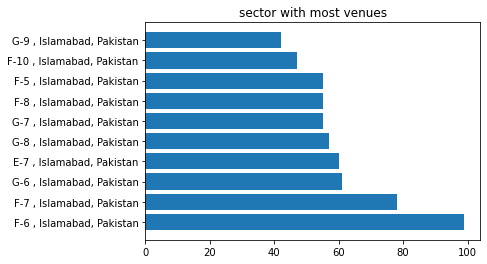

In [75]:
top_sec = isb_venues.groupby('Neighborhood',as_index=False).count().sort_values('Venue',ascending=False)
plt.barh( top_sec['Neighborhood'][0:10],width=top_sec['Venue Category'][0:10])
plt.title('sector with most venues')

Let's see top 10 venues in all sectors

Text(0.5, 1.0, 'top 10 venues')

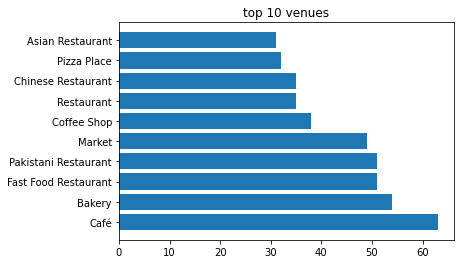

In [74]:
ven_cat = isb_venues.groupby('Venue Category', as_index=False)['Neighborhood'].count().sort_values('Neighborhood',ascending=False)
plt.barh(ven_cat['Venue Category'][0:10], width=ven_cat['Neighborhood'][0:10])
plt.title('top 10 venues')

Visualizing all venues

In [76]:
map_isb_ven = folium.Map(location=isb_center, zoom_start=11)

# add markers to map
for lat, lng, venue in zip(isb_venues['Venue Latitude'], isb_venues['Venue Longitude'], isb_venues['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_isb_ven)  
    
map_isb_ven 

#### Analyzing Each Sector

In [80]:
isb_onehot = pd.get_dummies(isb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
isb_onehot['Neighborhood'] = isb_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [isb_onehot.columns[-1]] + list(isb_onehot.columns[:-1])
isb_onehot = isb_onehot[fixed_columns]

isb_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Big Box Store,...,Soup Place,Spa,Stadium,Steakhouse,Supermarket,Tea Room,Theater,Theme Park Ride / Attraction,Trail,Wings Joint
0,"Diplomatic Enclave , Islamabad, Pakistan",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Diplomatic Enclave , Islamabad, Pakistan",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Diplomatic Enclave , Islamabad, Pakistan",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Diplomatic Enclave , Islamabad, Pakistan",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Diplomatic Enclave , Islamabad, Pakistan",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
isb_onehot.shape

(944, 95)

#### Next, let's group rows by sectors and by taking the mean of the frequency of occurrence of each category

In [82]:
isb_grouped = isb_onehot.groupby('Neighborhood').mean().reset_index()
isb_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Big Box Store,...,Soup Place,Spa,Stadium,Steakhouse,Supermarket,Tea Room,Theater,Theme Park Ride / Attraction,Trail,Wings Joint
0,"B-17 , Islamabad, Pakistan",0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"D-12 , Islamabad, Pakistan",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"D-17 , Islamabad, Pakistan",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Diplomatic Enclave , Islamabad, Pakistan",0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.00,...,0.000000,0.0,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000
4,"E-11 , Islamabad, Pakistan",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.035714
5,"E-17 , Islamabad, Pakistan",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"E-7 , Islamabad, Pakistan",0.016667,0.033333,0.016667,0.000000,0.033333,0.000000,0.016667,0.033333,0.00,...,0.000000,0.0,0.000000,0.033333,0.000000,0.016667,0.000000,0.000000,0.033333,0.000000
7,"E-8 , Islamabad, Pakistan",0.026316,0.052632,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.00,...,0.000000,0.0,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000
8,"E-9 , Islamabad, Pakistan",0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"F-10 , Islamabad, Pakistan",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.063830,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.042553,0.000000,0.000000,0.000000,0.000000


In [83]:
isb_grouped.shape

(38, 95)

#### Let's print each sector along with the top 5 most common venues

In [84]:
num_top_venues = 5

for hood in isb_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = isb_grouped[isb_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----B-17 , Islamabad, Pakistan----
                   venue  freq
0       Asian Restaurant   1.0
1      Afghan Restaurant   0.0
2     Miscellaneous Shop   0.0
3               Pharmacy   0.0
4  Performing Arts Venue   0.0


----D-12 , Islamabad, Pakistan----
                  venue  freq
0        Shopping Plaza   0.5
1                   Spa   0.5
2    Mexican Restaurant   0.0
3                  Park   0.0
4  Pakistani Restaurant   0.0


----D-17 , Islamabad, Pakistan----
               venue  freq
0     Cosmetics Shop   0.5
1   Business Service   0.5
2  Afghan Restaurant   0.0
3              Motel   0.0
4           Pharmacy   0.0


----Diplomatic Enclave , Islamabad, Pakistan----
         venue  freq
0        Hotel  0.13
1   Restaurant  0.13
2       Bakery  0.07
3  Golf Course  0.07
4          Gym  0.07


----E-11 , Islamabad, Pakistan----
                  venue  freq
0                  Café  0.18
1        Ice Cream Shop  0.14
2  Pakistani Restaurant  0.07
3                Bakery  0.07

#### Let's put that into a _pandas_ dataframe

First, let's write a function to sort the venues in descending order.

In [85]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each sector.

In [86]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = isb_grouped['Neighborhood']

for ind in np.arange(isb_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(isb_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"B-17 , Islamabad, Pakistan",Asian Restaurant,Wings Joint,Frozen Yogurt Shop,Donut Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food
1,"D-12 , Islamabad, Pakistan",Spa,Shopping Plaza,Wings Joint,Food Court,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop
2,"D-17 , Islamabad, Pakistan",Cosmetics Shop,Business Service,Wings Joint,Diner,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food
3,"Diplomatic Enclave , Islamabad, Pakistan",Hotel,Restaurant,Bakery,Coffee Shop,Go Kart Track,Golf Course,Hotel Pool,Lounge,Asian Restaurant,Steakhouse
4,"E-11 , Islamabad, Pakistan",Café,Ice Cream Shop,Gym,Pakistani Restaurant,Coffee Shop,Bakery,Wings Joint,Breakfast Spot,Historic Site,Diner


#### Cluster Neighborhoods

We will use K-mean clustering to segment sectors with most common venues. First we will choose best value of k using inertia.

In [87]:
isb_grouped_clustering = isb_grouped.drop('Neighborhood', 1)
# set number of clusters
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 6)

for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(isb_grouped_clustering)
 
    distortions.append(sum(np.min(distance.cdist(isb_grouped_clustering, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / isb_grouped_clustering.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(distance.cdist(isb_grouped_clustering, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / isb_grouped_clustering.shape[0]
    mapping2[k] = kmeans.inertia_

Plotting the values of inertia to get best value of k

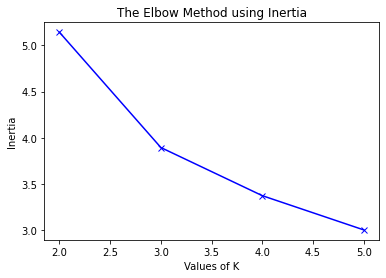

In [88]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

So as we can see, 3 seems a good value of k

In [89]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(isb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 1, 2, 2, 1, 2, 2, 2, 2], dtype=int32)

In [90]:
isb_zone_1.rename(columns={'Address': 'Neighborhood'}, inplace=True)
isb_zone_1.head()

,Zone,Neighborhood,Latitude,Longitude
0,Zone-I,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830
1,Zone-I,"Pakistan Secretariat , Islamabad, Pakistan",33.742203,73.095618
2,Zone-I,"B-17 , Islamabad, Pakistan",33.690398,72.828639
3,Zone-I,"D-12 , Islamabad, Pakistan",33.701818,72.948619
4,Zone-I,"E-7 , Islamabad, Pakistan",33.727498,73.051239


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [94]:
# add clustering labels
#neighborhoods_venues_sorted.drop('Cluster Labels',1,inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

isb_merged = isb_zone_1

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
isb_merged = isb_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

isb_merged.head() # check the last columns!

,Zone,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Zone-I,"Diplomatic Enclave , Islamabad, Pakistan",33.723606,73.111830,2,Hotel,Restaurant,Bakery,Coffee Shop,Go Kart Track,Golf Course,Hotel Pool,Lounge,Asian Restaurant,Steakhouse
1,Zone-I,"Pakistan Secretariat , Islamabad, Pakistan",33.742203,73.095618,2,Café,Italian Restaurant,Coffee Shop,Trail,Hookah Bar,Dessert Shop,Theater,Historic Site,Steakhouse,Asian Restaurant
2,Zone-I,"B-17 , Islamabad, Pakistan",33.690398,72.828639,0,Asian Restaurant,Wings Joint,Frozen Yogurt Shop,Donut Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food
3,Zone-I,"D-12 , Islamabad, Pakistan",33.701818,72.948619,2,Spa,Shopping Plaza,Wings Joint,Food Court,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop
4,Zone-I,"E-7 , Islamabad, Pakistan",33.727498,73.051239,2,Chinese Restaurant,Burger Joint,Fast Food Restaurant,Ice Cream Shop,Market,Pizza Place,Café,Italian Restaurant,Hookah Bar,Trail


Finally, let's visualize the resulting clusters

In [95]:
# create map
map_clusters = folium.Map(location=isb_center, zoom_start=11)

# set color scheme for the clusters]
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(isb_merged['Latitude'], isb_merged['Longitude'], isb_merged['Neighborhood'], isb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

So in this cluster we are outliers in Zone-1, that is we got two sectors B-17 and I-16. 

In [96]:
isb_merged.loc[isb_merged['Cluster Labels'] == 0, isb_merged.columns[[1] + list(range(5, isb_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"B-17 , Islamabad, Pakistan",Asian Restaurant,Wings Joint,Frozen Yogurt Shop,Donut Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food
32,"I-16 , Islamabad, Pakistan",Asian Restaurant,Wings Joint,Frozen Yogurt Shop,Donut Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food


Rest of sectors have similar venues

In [98]:
isb_merged.loc[isb_merged['Cluster Labels'] == 2, isb_merged.columns[[1] + list(range(5, isb_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Diplomatic Enclave , Islamabad, Pakistan",Hotel,Restaurant,Bakery,Coffee Shop,Go Kart Track,Golf Course,Hotel Pool,Lounge,Asian Restaurant,Steakhouse
1,"Pakistan Secretariat , Islamabad, Pakistan",Café,Italian Restaurant,Coffee Shop,Trail,Hookah Bar,Dessert Shop,Theater,Historic Site,Steakhouse,Asian Restaurant
3,"D-12 , Islamabad, Pakistan",Spa,Shopping Plaza,Wings Joint,Food Court,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop
4,"E-7 , Islamabad, Pakistan",Chinese Restaurant,Burger Joint,Fast Food Restaurant,Ice Cream Shop,Market,Pizza Place,Café,Italian Restaurant,Hookah Bar,Trail
5,"E-8 , Islamabad, Pakistan",Fast Food Restaurant,Restaurant,Chinese Restaurant,Market,Burger Joint,Pakistani Restaurant,Ice Cream Shop,Trail,American Restaurant,Indian Restaurant
6,"E-9 , Islamabad, Pakistan",Pakistani Restaurant,Indian Restaurant,Park,Pizza Place,Plaza,Fast Food Restaurant,Restaurant,Lounge,Intersection,Food
7,"E-11 , Islamabad, Pakistan",Café,Ice Cream Shop,Gym,Pakistani Restaurant,Coffee Shop,Bakery,Wings Joint,Breakfast Spot,Historic Site,Diner
8,"F-5 , Islamabad, Pakistan",Café,Italian Restaurant,Pizza Place,Coffee Shop,Steakhouse,Asian Restaurant,Pharmacy,Market,Trail,Hotel
9,"F-6 , Islamabad, Pakistan",Café,Burger Joint,Asian Restaurant,Italian Restaurant,Coffee Shop,Market,Pizza Place,Fast Food Restaurant,Steakhouse,Ice Cream Shop
10,"F-7 , Islamabad, Pakistan",Chinese Restaurant,Fast Food Restaurant,Bakery,Pakistani Restaurant,Ice Cream Shop,Burger Joint,Coffee Shop,Asian Restaurant,Café,Department Store


## Results and Discussion <a name="results"></a>

#### What are the most common venues in Zone-I?

So during EDA, we have observed that top veneues of Zone-1 are following:
1. Cafe
2. Bakery 
3. Fast Food Restaurant 
4. Pakistani Restaurant 
5. Markets
6. Coffee Shop 
7. Restaurant 
8. Chinese Restaurant 
9. Pizza Place
10. Asian Restaurant 

It can be noted that 9 out of 10 most common veneues are Food places. Particularly Chinese & Fast Food/Pizza restaurants are topping the list alongside traditional Pakistani restaurants & tea houses.

#### Which sectors in Zone-I have highest venues?

We have observed that following sectors have most veneues in Zone-1:
1. F-6 , Islamabad
2. F-7 , Islamabad
3. G-6 , Islamabad
4. E-7 , Islamabad
5. G-8 , Islamabad
6. G-7 , Islamabad 
7. F-8 , Islamabad
8. F-5, Islamabad
9. F-10, Islamabad
10. G-9 , Islamabad

We can notice that 5 out of 10 sectors belong to 'F' belt so we can say that these sectors are most developed in Islamabad.  

#### Which sectors in Zone-I are yet to be developed based on most common venues?

After clustering most common veneues in Zone-I, results show that all sectors of Zone-I have similar veneues particulary food places except sector I-16 & B-17. I-16 & B-17 are still under development and does not have much of common venues yet. This, of course, does not imply that these sectors are actually optimal locations for a new restaurant! We tried to provide a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to explore, segment, and cluster the Zone-1 sectors in the city of Islamabad
based on most common venue information. We tried to answer following stakeholder questions so they can make investment decision:

1. What are the most common venues in Zone-I?
2. Which sectors in Zone-I have highest venues?
3. Which sectors in Zone-I are yet to be developed based on most common venues?
 
Location & venue data is collected using Geopy & Foursquare API respectively. Exploratory data analysis is performed to get answer of 1st and 2nd question. Clustering of common veneues was then performed in order to answer 3rd question and create major zones of interest (containing least common venues).

Final decission on optimal business location will be made by stakeholders based on specific characteristics of  locations in every recommended sector, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.